In [1]:
#import necessary libires
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image

In [2]:
#Download the data
!wget http://cb.lk/covid_19

--2021-12-05 10:56:00--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-12-05 10:56:01--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-12-05 10:56:01--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-12

In [3]:
#unzip the data
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [4]:
#Path for the Tain data and Test data
Train_path = '/content/CovidDataset/Train'
Valid_path = '/content/CovidDataset/Val'

In [5]:
#Base model
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = 'adam',metrics = ['accuracy'])

In [6]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                        

In [7]:
#Image Data Generator and scaling
train_dataset = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip= True
)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_dataset.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size=(224,224),
    batch_size =32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [9]:
validation_generator = test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size=(224,224),
    batch_size =32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
#model training
training = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
7/7 [==============================] - 27s 2s/step - loss: 0.7324 - accuracy: 0.5179 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.6914 - accuracy: 0.5179 - val_loss: 0.6318 - val_accuracy: 0.7000
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.5674 - accuracy: 0.7188 - val_loss: 0.3630 - val_accuracy: 0.9833
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.3533 - accuracy: 0.8571 - val_loss: 0.2079 - val_accuracy: 0.9833
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.2509 - accuracy: 0.9420 - val_loss: 0.0668 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.2888 - accuracy: 0.9018 - val_loss: 0.1184 - val_accuracy: 0.9333
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.2498 - accuracy: 0.9107 - val_loss: 0.1579 - val_accuracy: 1.0000
Epoch 8/10
7/7 [==================

Model Evaluation

In [12]:
#training loss and accuracy
model.evaluate(train_generator)

7/7 [==============================] - 8s 1s/step - loss: 0.0859 - accuracy: 0.9643


[0.08585988730192184, 0.9642857313156128]

In [13]:
#test loss and accuracy
model.evaluate(validation_generator)

2/2 [==============================] - 2s 893ms/step - loss: 0.0316 - accuracy: 0.9833


[0.03163578733801842, 0.9833333492279053]

In [14]:
#save the model
model =model.save('model_cov.h5')


In [15]:
#load the model
model=load_model('model_cov.h5')

Test Images

In [16]:
y_actual = []
y_test = []

for i in os.listdir('/content/CovidDataset/Val/Normal/'):
  img = image.load_img('/content/CovidDataset/Val/Normal/'+i,target_size=(224,224))
  img=image.img_to_array(img)
  img= np.expand_dims(img,axis=0)
  p= model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [17]:
for i in os.listdir('/content/CovidDataset/Val/Covid/'):
  img = image.load_img('/content/CovidDataset/Val/Covid/'+i,target_size=(224,224))
  img=image.img_to_array(img)
  img= np.expand_dims(img,axis=0)
  p= model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [18]:
y_actual= np.array(y_actual)
y_test= np.array(y_test)

Confusion Matrix

In [19]:
cm=confusion_matrix(y_actual,y_test)

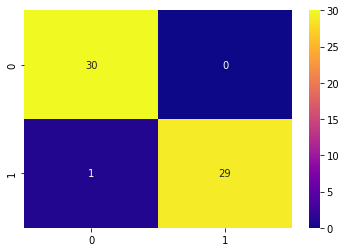

In [20]:
sns.heatmap(cm,cmap='plasma',annot=True)

# Thanks for view if you like it you can leave a star.